<a href="https://colab.research.google.com/github/ajanaferreira/bootcampdataanalytics/blob/main/Graficos_Janaina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Desafio Prático 1
Neste desafio, serão visualizados dados de diferentes formas utilizando Matplotlib, Seaborn e Plotly. Serão criados gráficos que mostram a distribuição dos dados, correlações entre variáveis e tendências.



In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

In [2]:
# 1. Carregar os dados de um arquivo CSV fornecido (saude.csv).
df = pd.read_csv('saude.csv')
df.head()

,id,age,height,weight,gender
0,1,23,170,70,M
1,2,34,160,65,F
2,3,45,175,80,M
3,4,25,165,55,F
4,5,36,180,90,M


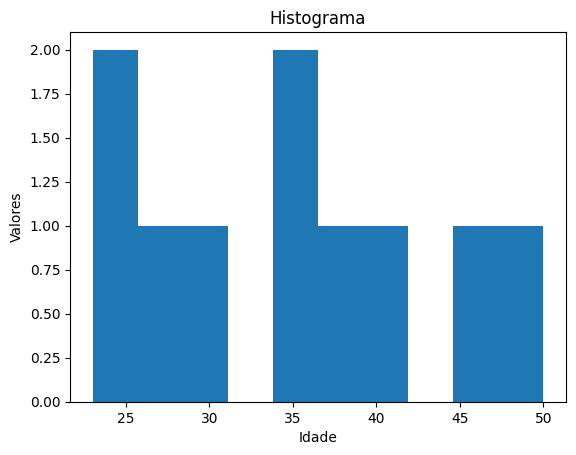

In [3]:
# 2. Criar um histograma da variável 'age' usando Matplotlib.

plt.hist(df['age'])
plt.xlabel('Idade')
plt.ylabel('Valores')
plt.title('Histograma')
plt.show()

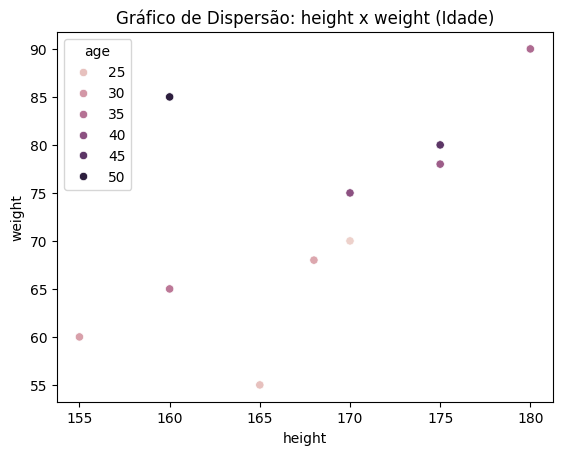

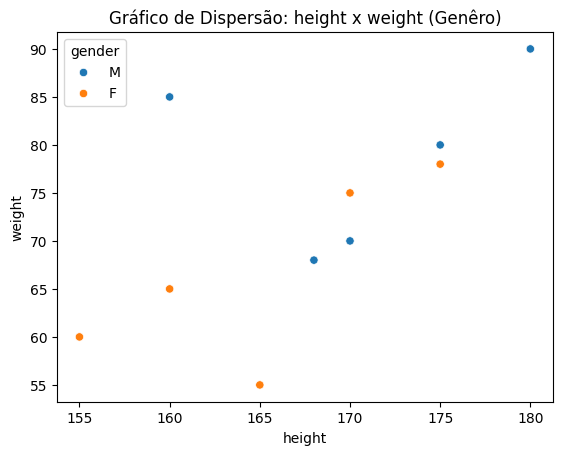

In [4]:
# 3. Criar um gráfico de dispersão mostrando a relação entre 'height' e 'weight' usando Seaborn

# Gráfico considerando a idade
sns.scatterplot(data=df, x='height', y='weight', hue='age')
plt.title('Gráfico de Dispersão: height x weight (Idade)')
plt.show()

#Gráfico considerando o genêro
sns.scatterplot(data=df, x='height', y='weight', hue='gender')
plt.title('Gráfico de Dispersão: height x weight (Genêro)')
plt.show()

In [ ]:
df.head()

,id,age,height,weight,gender
0,1,23,170,70,M
1,2,34,160,65,F
2,3,45,175,80,M
3,4,25,165,55,F
4,5,36,180,90,M


In [5]:
# 4. Criar um gráfico interativo de barras mostrando a contagem de indivíduos por 'gender' usando Plotly.
fig = px.bar(df, x='gender', title='Contagem de indivíduos por gênero')
fig.show()

#Desafio Prático 2
Neste desafio, será feita a análise de uma série temporal de dados de
vendas. Serão criados gráficos que mostrem as vendas ao longo do tempo, identificando tendências e sazonalidades.




In [6]:
# 1. Carregar os dados de um arquivo CSV fornecido (vendas.csv).
df2 = pd.read_csv('vendas.csv')
df2.head()

,date,sales
0,2023-01-01,100
1,2023-01-02,150
2,2023-01-03,200
3,2023-01-04,130
4,2023-01-05,180


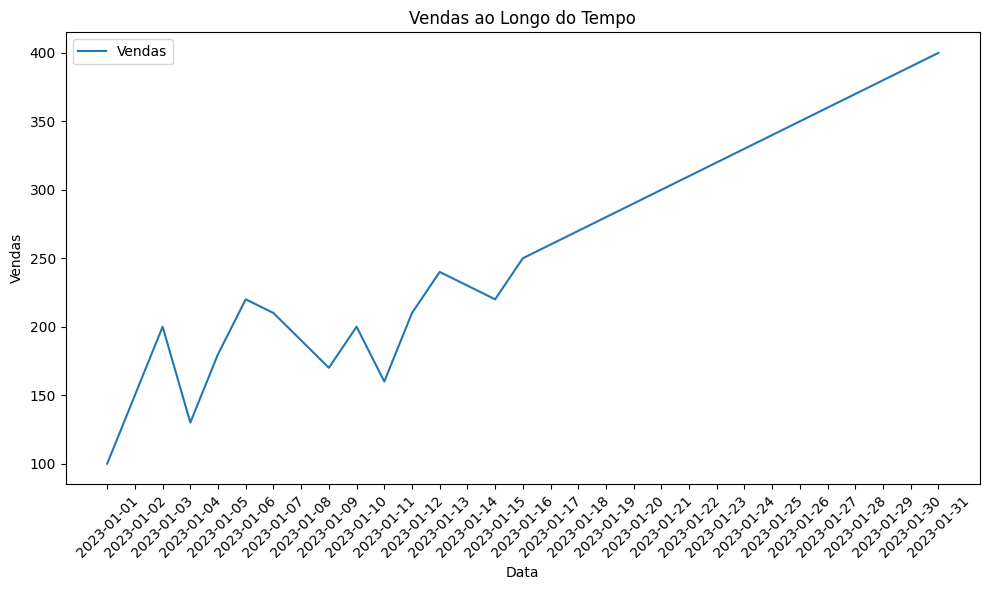

In [7]:
# 2. Criar um gráfico de linhas das vendas ao longo do tempo usando Matplotlib.
plt.figure(figsize=(10, 6))
plt.plot(df2['date'], df2['sales'], label='Vendas')
plt.xlabel('Data')
plt.ylabel('Vendas')
plt.title('Vendas ao Longo do Tempo')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [14]:
df2.shape

(31, 2)

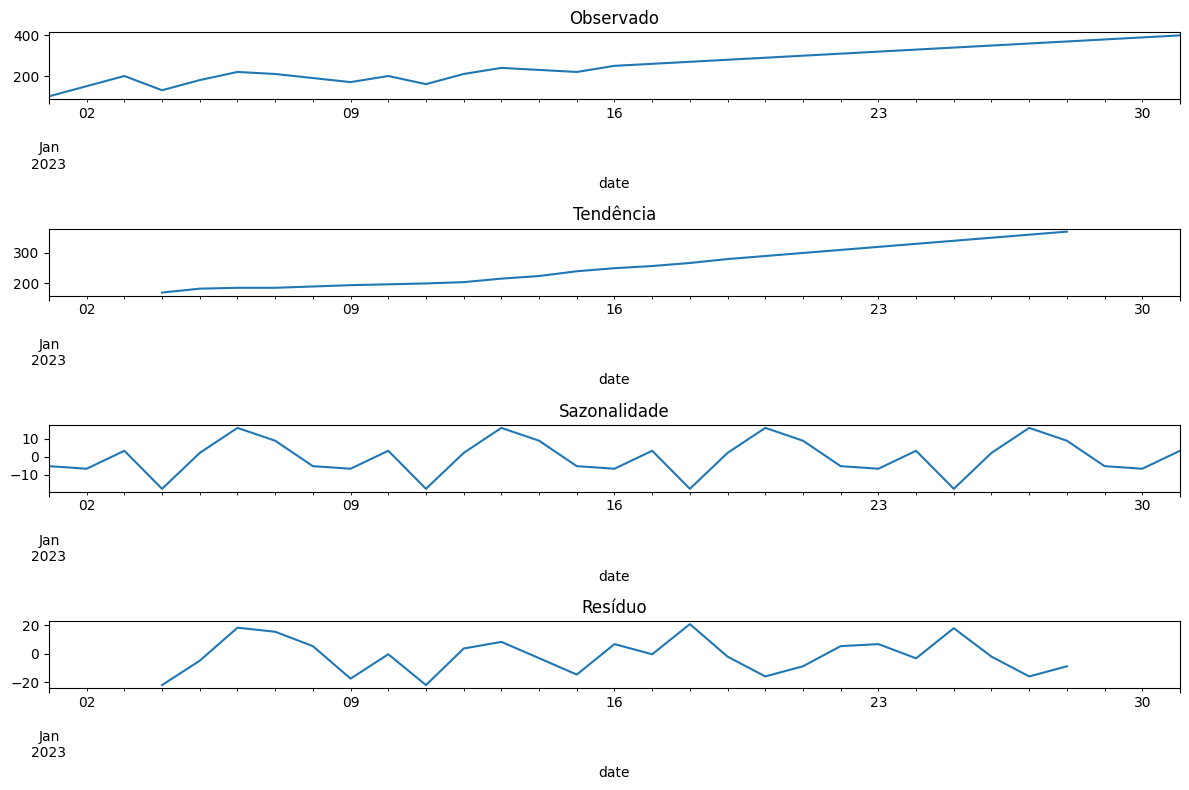

In [15]:
# 3. Criar um gráfico de decomposição sazonal usando Seaborn.

df2['date'] = pd.to_datetime(df2['date'])  # Convertendo a coluna de datas
df2.set_index('date', inplace=True)

df2 = df2.asfreq('D')

decomposition = seasonal_decompose(df2['sales'], model='additive')

# Plotar os componentes
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 8))
decomposition.observed.plot(ax=ax1)
ax1.set_title('Observado')
decomposition.trend.plot(ax=ax2)
ax2.set_title('Tendência')
decomposition.seasonal.plot(ax=ax3)
ax3.set_title('Sazonalidade')
decomposition.resid.plot(ax=ax4)
ax4.set_title('Resíduo')
plt.tight_layout()
plt.show()


In [22]:
# 4. Criar um gráfico interativo que permita a exploração dos dados de vendas ao longo do tempo usando Plotly

df2 = df2.reset_index()

fig = px.line(df2, x="date", y="sales",
              title="Vendas ao Longo do Tempo",
              labels={"date": "Data", "sales": "Vendas"})

fig.show()
